In [1]:
import importlib
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

from CASutils import lineplot_utils as lineplot
from CASutils import bootstrap_utils as boot
from CASutils import filter_utils as filt
from CASutils import calendar_utils as cal

from scipy import stats

importlib.reload(lineplot)
importlib.reload(boot)
importlib.reload(filt)
importlib.reload(cal)

<module 'CASutils.calendar_utils' from '/home/islas/python/CASanalysis/CASutils/calendar_utils.py'>

In [2]:
plotpath="/project/cas/islas/python_plots/snowpaper/FIGURES/"
datapath="/project/cas/islas/python_savs/snowpaper/DATA_SORT/3cities/"

In [148]:
# GOGA2 FSNO
#dat = xr.open_dataset(datapath+"GOGA2_FSNO.nc")
#goga2fsno = np.zeros([365,3])
#for icity in range(0,3,1):
#    datuse = np.array(dat.goga2.isel(city=icity))
#    nyears = datuse.shape[1]/365
#    datuse = np.reshape(datuse,[10,int(nyears),365])
#    goga2fsno[:,icity] = np.mean(datuse, axis=(0,1))

GOGA seasonality of variance

In [3]:
#GOGA
dat = xr.open_dataset(datapath+"GOGA/GOGA1_TREFHT.nc")
goga1var = np.zeros([365,3])
goga1range = np.zeros([2,365,3])
for icity in range(0,3,1):
    datuse = np.array(dat.goga1.isel(city=icity))
    nyears = datuse.shape[1]/365
    datuse = np.reshape(datuse,[10,int(nyears),365])
    goga1var[:,icity] = np.var(datuse, axis=(0,1)) 
    datuse = np.reshape(datuse,[10*int(nyears),365])
    bootdat = boot.bootgen(datuse)
    bootdatvar = np.var(bootdat, axis=(1))
    goga1range[:,:,icity] = np.percentile(bootdatvar, [2.5, 97.5], axis=0)

you are using a numpy array
you are using a numpy array
you are using a numpy array


In [4]:
#GOGA2
dat = xr.open_dataset(datapath+"GOGA/GOGA2_TREFHT.nc")
goga2var = np.zeros([365,3])
goga2range = np.zeros([2,365,3])
for icity in range(0,3,1):
    datuse = np.array(dat.goga2.isel(city=icity))
    nyears = datuse.shape[1]/365
    datuse = np.reshape(datuse,[10,int(nyears),365])
    goga2var[:,icity] = np.var(datuse, axis=(0,1)) 
    datuse = np.reshape(datuse,[10*int(nyears),365])
    bootdat = boot.bootgen(datuse)
    bootdatvar = np.var(bootdat, axis=(1))
    goga2range[:,:,icity] = np.percentile(bootdatvar, [2.5, 97.5], axis=0)

you are using a numpy array
you are using a numpy array
you are using a numpy array


TREFHT PDFs

In [5]:
# BEST
dat = xr.open_dataset(datapath+"OBS/BEST_TREFHT.nc")
daystr = xr.DataArray(dat.indexes['time'].strftime('%m-%d'), coords = dat.time.coords, name="daystr")
datseas = dat.best.groupby(daystr).mean('time')
dat4harm = filt.calc_season_nharm(datseas,4,dimtime=1)
datanoms = dat.best.groupby(daystr)-dat4harm
datdjfanoms = cal.group_season_daily(datanoms,'DJF')
datmean = datdjfanoms.mean('day')
bestdjfanoms = datdjfanoms - datmean

nyears=35.0


In [8]:
#ISD
dat = xr.open_dataset(datapath+"OBS/ISD_TREFHT.nc")
datseas = dat.isd.groupby('time.dayofyear').mean('time')
dat4harm = filt.calc_season_nharm(datseas,4,dimtime=1)
datanoms = dat.isd.groupby('time.dayofyear') - dat4harm
datdjfanoms = cal.group_season_daily(datanoms,'DJF')
datmean = datdjfanoms.mean('day')
ghcndjfanoms = datdjfanoms - datmean

nyears=35.0


In [9]:
# ERA5
dat = xr.open_dataset(datapath+"OBS/ERA5_TREFHT.nc")
daystr = xr.DataArray(dat.indexes['time'].strftime('%m-%d'), coords = dat.time.coords, name="daystr")
datseas = dat.era5.groupby(daystr).mean('time')
dat4harm = filt.calc_season_nharm(datseas,4,dimtime=1)
datanoms = dat.era5.groupby(daystr)-dat4harm
datdjfanoms = cal.group_season_daily(datanoms,'DJF')
datmean = datdjfanoms.mean('day')
era5djfanoms = datdjfanoms - datmean

nyears=35.0


In [10]:
# GOGA1
dat = xr.open_dataset(datapath+"GOGA/GOGA1_TREFHT.nc")
datseas = dat.goga1.groupby('time.dayofyear').mean('time')
dat4harm = filt.calc_season_nharm(datseas,4,dimtime=1)
datanoms = dat.goga1.groupby('time.dayofyear') - dat4harm
datdjfanoms = cal.group_season_daily(datanoms,'DJF')
datmean = datdjfanoms.mean('day')
goga1djfanoms = datdjfanoms - datmean

moving time axis to the start
nyears=35.0


In [11]:
# GOGA2
dat = xr.open_dataset(datapath+"GOGA/GOGA2_TREFHT.nc")
datseas = dat.goga2.groupby('time.dayofyear').mean('time')
dat4harm = filt.calc_season_nharm(datseas,4,dimtime=1)
datanoms = dat.goga2.groupby('time.dayofyear') - dat4harm
datdjfanoms = cal.group_season_daily(datanoms,'DJF')
datmean = datdjfanoms.mean('day')
goga2djfanoms = datdjfanoms - datmean

moving time axis to the start
nyears=35.0


In [12]:
bins = np.arange(-35,36,1)
goga1pdf = np.zeros([bins.size,10,3])
goga2pdf = np.zeros([bins.size,10,3])

for imem in np.arange(0,goga1djfanoms.Member.size,1):
    for icity in np.arange(0,goga1djfanoms.city.size,1):
        dat = goga1djfanoms.isel(Member=imem, city=icity)
        dat = np.array(dat).flatten()
        kernel = stats.gaussian_kde(dat)
        goga1pdf[:,imem,icity] = kernel(bins)*100.
        
        dat = goga2djfanoms.isel(Member=imem, city=icity)
        dat = np.array(dat).flatten()
        kernel = stats.gaussian_kde(dat)
        goga2pdf[:,imem,icity] = kernel(bins)*100.
        
bestpdf = np.zeros([bins.size,3])
ghcnpdf = np.zeros([bins.size,3])
era5pdf = np.zeros([bins.size,3])
for icity in np.arange(0,bestdjfanoms.city.size,1):
    dat = bestdjfanoms.isel(city=icity)
    dat = np.array(dat).flatten()
    kernel = stats.gaussian_kde(dat)
    bestpdf[:,icity] = kernel(bins)*100.
    
    dat = ghcndjfanoms.isel(city=icity)
    dat = np.array(dat).flatten()
    dat = dat[~np.isnan(dat)] # remove nans
    kernel = stats.gaussian_kde(dat)
    ghcnpdf[:,icity] = kernel(bins)*100.
    
    dat = era5djfanoms.isel(city=icity)
    dat = np.array(dat).flatten()
    kernel = stats.gaussian_kde(dat)
    era5pdf[:,icity] = kernel(bins)*100.
 

In [13]:
goga1mintrefht = np.amin(goga1pdf, axis=1) ; goga1maxtrefht = np.amax(goga1pdf,axis=1)
goga2mintrefht = np.amin(goga2pdf, axis=1) ; goga2maxtrefht = np.amax(goga2pdf,axis=1)

T850 PDFs

In [14]:
# ERA5
dat = xr.open_dataset(datapath+"/OBS/ERA5_T850.nc")
daystr = xr.DataArray(dat.indexes['time'].strftime('%m-%d'), coords = dat.time.coords, name="daystr")
datseas = dat.era5.groupby(daystr).mean('time')
dat4harm = filt.calc_season_nharm(datseas,4,dimtime=1)
datanoms = dat.era5.groupby(daystr)-dat4harm
datdjfanoms = cal.group_season_daily(datanoms,'DJF')
datmean = datdjfanoms.mean('day')
era5djfanoms_850 = datdjfanoms - datmean

nyears=35.0


In [15]:
# GOGA1
dat = xr.open_dataset(datapath+"/GOGA/GOGA1_T850.nc")
datseas = dat.goga1.groupby('time.dayofyear').mean('time')
dat4harm = filt.calc_season_nharm(datseas,4,dimtime=1)
datanoms = dat.goga1.groupby('time.dayofyear') - dat4harm
datdjfanoms = cal.group_season_daily(datanoms,'DJF')
datmean = datdjfanoms.mean('day')
goga1djfanoms_850 = datdjfanoms - datmean

moving time axis to the start
nyears=35.0


In [16]:
# GOGA2
dat = xr.open_dataset(datapath+"/GOGA/GOGA2_T850.nc")
datseas = dat.goga2.groupby('time.dayofyear').mean('time')
dat4harm = filt.calc_season_nharm(datseas,4,dimtime=1)
datanoms = dat.goga2.groupby('time.dayofyear') - dat4harm
datdjfanoms = cal.group_season_daily(datanoms,'DJF')
datmean = datdjfanoms.mean('day')
goga2djfanoms_850 = datdjfanoms - datmean

moving time axis to the start
nyears=35.0


In [17]:
bins = np.arange(-35,36,1)
goga1pdf_850 = np.zeros([bins.size,10,3])
goga2pdf_850 = np.zeros([bins.size,10,3])

for imem in np.arange(0,goga1djfanoms.Member.size,1):
    for icity in np.arange(0,goga1djfanoms.city.size,1):
        dat = goga1djfanoms_850.isel(Member=imem, city=icity)
        dat = np.array(dat).flatten()
        kernel = stats.gaussian_kde(dat)
        goga1pdf_850[:,imem,icity] = kernel(bins)*100.
        
        dat = goga2djfanoms_850.isel(Member=imem, city=icity)
        dat = np.array(dat).flatten()
        kernel = stats.gaussian_kde(dat)
        goga2pdf_850[:,imem,icity] = kernel(bins)*100.
        

era5pdf_850 = np.zeros([bins.size,3])
for icity in np.arange(0,era5djfanoms.city.size,1):    
    dat = era5djfanoms_850.isel(city=icity)
    dat = np.array(dat).flatten()
    kernel = stats.gaussian_kde(dat)
    era5pdf_850[:,icity] = kernel(bins)*100.
 

In [18]:
goga1min850 = np.amin(goga1pdf_850, axis=1) ; goga1max850 = np.amax(goga1pdf_850,axis=1)
goga2min850 = np.amin(goga2pdf_850, axis=1) ; goga2max850 = np.amax(goga2pdf_850,axis=1)

plotting

In [19]:
def plotlogpdf(fig,titlestr,x1,x2,y1,y2):
    ax = fig.add_axes([x1,y1,(x2-x1),(y2-y1)])
    
    ax.set_ylim(np.log10(0.01),np.log10(15))
    ax.set_yticks([np.log10(0.01),np.log10(0.03),np.log10(0.1),np.log10(0.3),np.log10(1),np.log10(3),np.log10(10)])
    ax.set_yticklabels(['0.01','0.03','0.1','0.3','1','3','10'], fontsize=12)
    ax.set_ylabel('Probability (%)', fontsize=12)
    ax.set_xlim([-35,35])
    ax.set_xticks([-30,-20,-10,0,10,20,30])
    ax.set_xticklabels(['-30','-20','-10','0','10','20','30'], fontsize=12)
    ax.set_xlabel('Temperature (K)', fontsize=14)
    ax.set_ylabel('Probability (%)', fontsize=14)
    ax.set_title(titlestr,fontsize=16)
    
    return ax

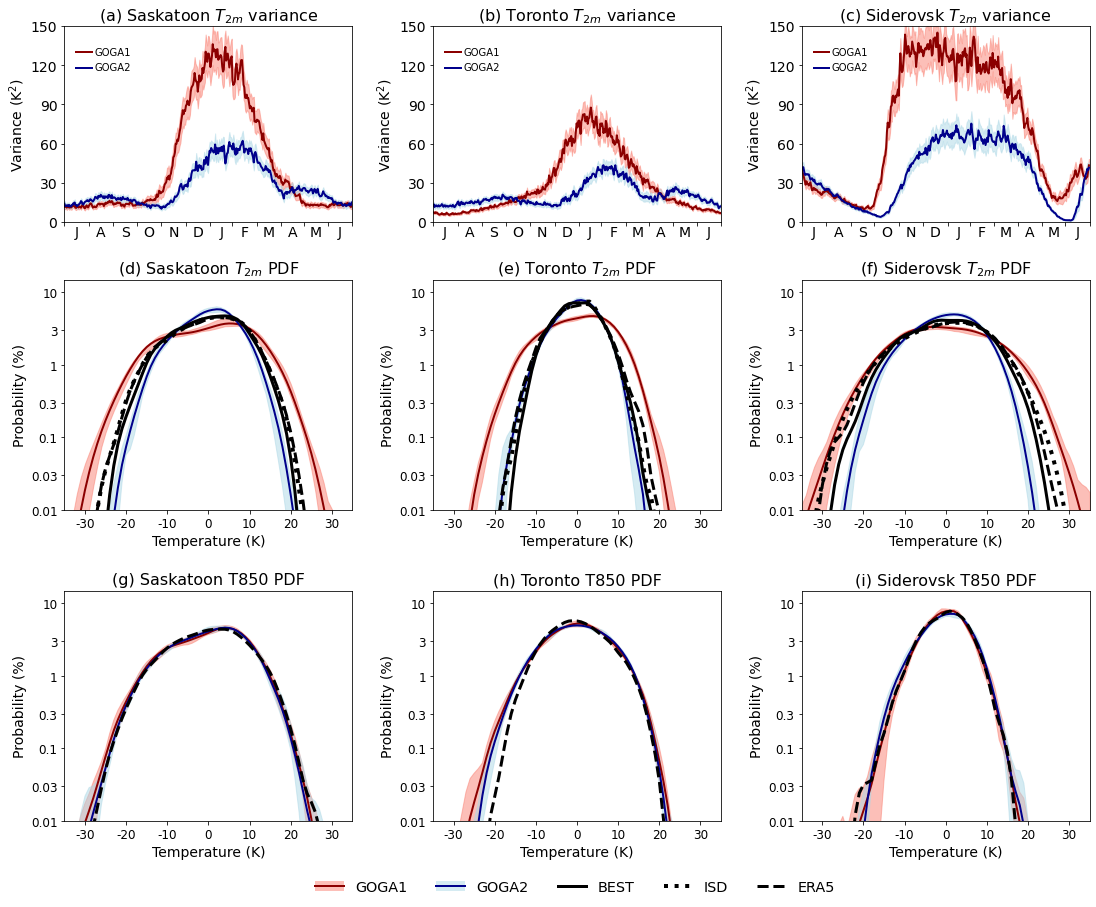

In [20]:
fig = plt.figure(figsize=(16,16))

# Saskatoon
ax = lineplot.plotlinetime_j2j(fig, goga1var[:,0],0.05,0.3,0.8,0.97,'(a) Saskatoon $T_{2m}$ variance',
                              yrange=(0,150), yticks=[0,30,60,90,120,150],
                              yticklabels=['0','30','60','90','120','150'],
                              ytitle='Variance (K$^{2}$)', linecolor='darkred')
ax = lineplot.oplotrange_j2j(ax, goga1range[0,:,0], goga1range[1,:,0], color='salmon')

ax = lineplot.oplotrange_j2j(ax, goga2range[0,:,0], goga2range[1,:,0], color='lightblue')
ax = lineplot.oplotlinetime_j2j(ax, goga2var[:,0], linecolor='darkblue')
ax.plot([15,35],[130,130],color='darkred', linewidth=2)
ax.text(38,128,'GOGA1')
ax.plot([15,35],[118,118],color='darkblue', linewidth=2)
ax.text(38,116,'GOGA2')


# Toronto
ax = lineplot.plotlinetime_j2j(fig, goga1var[:,1],0.37,0.62,0.8,0.97,'(b) Toronto $T_{2m}$ variance',
                              yrange=(0,150), yticks=[0,30,60,90,120,150],
                              yticklabels=['0','30','60','90','120','150'],
                              ytitle='Variance (K$^{2}$)', linecolor='darkred')
ax = lineplot.oplotrange_j2j(ax, goga1range[0,:,1], goga1range[1,:,1], color='salmon')

ax = lineplot.oplotrange_j2j(ax, goga2range[0,:,1], goga2range[1,:,1], color='lightblue')
ax = lineplot.oplotlinetime_j2j(ax, goga2var[:,1], linecolor='darkblue')
ax.plot([15,35],[130,130],color='darkred', linewidth=2)
ax.text(38,128,'GOGA1')
ax.plot([15,35],[118,118],color='darkblue', linewidth=2)
ax.text(38,116,'GOGA2')



# Siderovsk
ax = lineplot.plotlinetime_j2j(fig, goga1var[:,2],0.69,0.94,0.8,0.97,'(c) Siderovsk $T_{2m}$ variance',
                              yrange=(0,150), yticks=[0,30,60,90,120,150],
                              yticklabels=['0','30','60','90','120','150'],
                              ytitle='Variance (K$^{2}$)', linecolor='darkred')
ax = lineplot.oplotrange_j2j(ax, goga1range[0,:,2], goga1range[1,:,2], color='salmon')

ax = lineplot.oplotrange_j2j(ax, goga2range[0,:,2], goga2range[1,:,2], color='lightblue')
ax = lineplot.oplotlinetime_j2j(ax, goga2var[:,2], linecolor='darkblue')
ax.plot([15,35],[130,130],color='darkred', linewidth=2)
ax.text(38,128,'GOGA1')
ax.plot([15,35],[118,118],color='darkblue', linewidth=2)
ax.text(38,116,'GOGA2')


ax1 = plotlogpdf(fig,'(d) Saskatoon $T_{2m}$ PDF', 0.05,0.3,0.55,0.75)
ax1.fill_between(bins,np.log10(goga1mintrefht[:,0]),np.log10(goga1maxtrefht[:,0]), color='salmon', alpha=0.5)
ax1.plot(bins,np.log10(goga1pdf[:,:,0].mean(axis=1)),color='darkred', linewidth=2)

ax1.fill_between(bins,np.log10(goga2mintrefht[:,0]),np.log10(goga2maxtrefht[:,0]), color='lightblue', alpha=0.5)
ax1.plot(bins,np.log10(goga2pdf[:,:,0].mean(axis=1)),color='darkblue', linewidth=2)
    
ax1.plot(bins,np.log10(bestpdf[:,0]), color='black', linewidth=3)
ax1.plot(bins,np.log10(ghcnpdf[:,0]), color='black', linewidth=4, linestyle='dotted' )
ax1.plot(bins,np.log10(era5pdf[:,0]), color='black', linewidth=3, linestyle='dashed')

ax1 = plotlogpdf(fig,'(e) Toronto $T_{2m}$ PDF', 0.37,0.62,0.55,0.75)
ax1.fill_between(bins,np.log10(goga1mintrefht[:,1]),np.log10(goga1maxtrefht[:,1]), color='salmon', alpha=0.5)
ax1.plot(bins,np.log10(goga1pdf[:,:,1].mean(axis=1)),color='darkred', linewidth=2)

ax1.fill_between(bins,np.log10(goga2mintrefht[:,1]),np.log10(goga2maxtrefht[:,1]), color='lightblue', alpha=0.5)
ax1.plot(bins,np.log10(goga2pdf[:,:,1].mean(axis=1)),color='darkblue', linewidth=2)
    
ax1.plot(bins,np.log10(bestpdf[:,1]), color='black', linewidth=3)
ax1.plot(bins,np.log10(ghcnpdf[:,1]), color='black', linewidth=4, linestyle='dotted' )
ax1.plot(bins,np.log10(era5pdf[:,1]), color='black', linewidth=3, linestyle='dashed')

ax1 = plotlogpdf(fig,'(f) Siderovsk $T_{2m}$ PDF', 0.69,0.94,0.55,0.75)
ax1.fill_between(bins,np.log10(goga1mintrefht[:,2]),np.log10(goga1maxtrefht[:,2]), color='salmon', alpha=0.5)
ax1.plot(bins,np.log10(goga1pdf[:,:,2].mean(axis=1)),color='darkred', linewidth=2)

ax1.fill_between(bins,np.log10(goga2mintrefht[:,2]),np.log10(goga2maxtrefht[:,2]), color='lightblue', alpha=0.5)
ax1.plot(bins,np.log10(goga2pdf[:,:,2].mean(axis=1)),color='darkblue', linewidth=2)
    
ax1.plot(bins,np.log10(bestpdf[:,2]), color='black', linewidth=3)
ax1.plot(bins,np.log10(ghcnpdf[:,2]), color='black', linewidth=4, linestyle='dotted' )
ax1.plot(bins,np.log10(era5pdf[:,2]), color='black', linewidth=3, linestyle='dashed')

from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
legendparts = [(Rectangle((0.95,0.95),5,3,facecolor='salmon', alpha=0.5),Line2D([0],[0],color='darkred', linewidth=2)),
               (Rectangle((0.96,0.96),5,3,facecolor='lightblue',alpha=0.5),Line2D([0],[0],color='darkblue',linewidth=2)),
              Line2D([0],[0],color='black',linewidth=3),
              Line2D([0],[0],color='black',linewidth=4,linestyle='dotted'),
              Line2D([0],[0],color='black',linewidth=3,linestyle='dashed')]

legendlabels = ['GOGA1','GOGA2','BEST','ISD','ERA5']
fig.legend(legendparts, legendlabels, bbox_to_anchor = (0.73, 0.24), ncol=5, frameon = False, fontsize='x-large')



ax1 = plotlogpdf(fig,'(g) Saskatoon T850 PDF', 0.05,0.3,0.28,0.48)
ax1.fill_between(bins,np.log10(goga1min850[:,0]),np.log10(goga1max850[:,0]), color='salmon', alpha=0.5)
ax1.plot(bins,np.log10(goga1pdf_850[:,:,0].mean(axis=1)),color='darkred', linewidth=2)

ax1.fill_between(bins,np.log10(goga2min850[:,0]),np.log10(goga2max850[:,0]), color='lightblue', alpha=0.5)
ax1.plot(bins,np.log10(goga2pdf_850[:,:,0].mean(axis=1)),color='darkblue', linewidth=2)
    
ax1.plot(bins,np.log10(era5pdf_850[:,0]), color='black', linewidth=3, linestyle='dashed')


ax2 = plotlogpdf(fig,'(h) Toronto T850 PDF', 0.37,0.62,0.28,0.48)
ax2.fill_between(bins,np.log10(goga1min850[:,1]),np.log10(goga1max850[:,1]), color='salmon', alpha=0.5)
ax2.plot(bins,np.log10(goga1pdf_850[:,:,1].mean(axis=1)),color='darkred', linewidth=2)

ax2.fill_between(bins,np.log10(goga2min850[:,1]),np.log10(goga2max850[:,1]), color='lightblue', alpha=0.5)
ax2.plot(bins,np.log10(goga2pdf_850[:,:,1].mean(axis=1)),color='darkblue', linewidth=2)
    
ax2.plot(bins,np.log10(era5pdf_850[:,1]), color='black', linewidth=3, linestyle='dashed')


ax3 = plotlogpdf(fig,'(i) Siderovsk T850 PDF', 0.69,0.94,0.28,0.48)
ax3.fill_between(bins,np.log10(goga1min850[:,2]),np.log10(goga1max850[:,2]), color='salmon', alpha=0.5)
ax3.plot(bins,np.log10(goga1pdf_850[:,:,2].mean(axis=1)),color='darkred', linewidth=2)

ax3.fill_between(bins,np.log10(goga2min850[:,2]),np.log10(goga2max850[:,2]), color='lightblue', alpha=0.5)
ax3.plot(bins,np.log10(goga2pdf_850[:,:,2].mean(axis=1)),color='darkblue', linewidth=2)
    
ax3.plot(bins,np.log10(era5pdf_850[:,2]), color='black', linewidth=3, linestyle='dashed')


In [21]:
fig.savefig(plotpath+'fig2.pdf', facecolor='white', bbox_inches='tight')